In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st

In [ ]:
def roll():
  choices = [1, 2, 3]
  probabilities = [0.4736, 0.4736, 0.0528]
  return np.random.choice(choices, p=probabilities)

In [ ]:
r = 0.5
b = 0.5
g = 1-r-b
payoff = []
bankroll_p1 = []
plt.figure(figsize=(12, 6))
# pr = 18/38
# pg = 2/38
# pb = 18/38

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
for i in range(1000):
  val = []
  rcount = 0
  bcount = 0
  gcount = 0
  current_trajectory = [0]
  running_cash = 0
  for j in range(1000):
    res = roll()
    val.append(res)
    if i == 0:
        if res == 1:
            change = r - b - g
        elif res == 2:
            change = b - r - g
        else:
            change = g - r - b
        running_cash += change
        current_trajectory.append(running_cash)
  for u in val:
    if u == 1:
      rcount += 1
    elif u == 2:
      bcount += 1
    else:
      gcount += 1

  if i == 0:
        bankroll_p1 = current_trajectory
  rprob = rcount/len(val)
  bprob = bcount/len(val)
  gprob = gcount/len(val)
  payoff.append(1000*((2*rprob-1)*r+(2*bprob-1)*b+(2*gprob-1)*g))

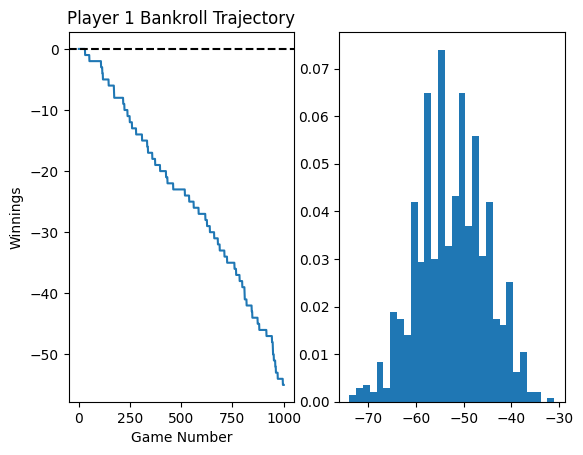

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(bankroll_p1)
plt.axhline(0, color='black', linestyle='--')
plt.title("Player 1 Bankroll Trajectory")
plt.xlabel("Game Number")
plt.ylabel("Winnings")

plt.subplot(1, 2, 2)
plt.hist(payoff, bins=30, density=True, label='Simulation')
plt.show()

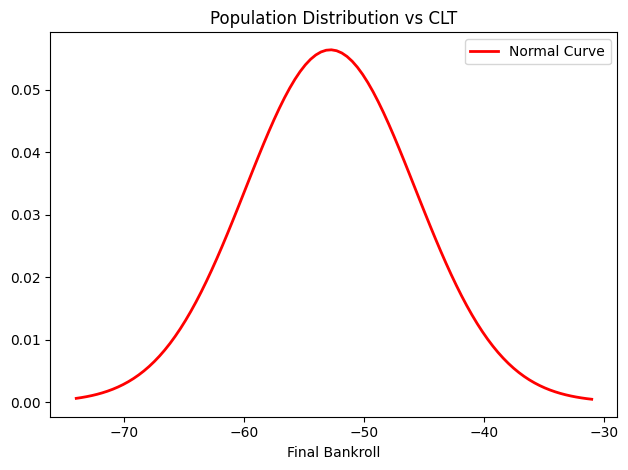

In [ ]:
pr = 0.4736
pb = 0.4736
pg = 0.0528

valr = r - b - g
valb = b - r - g
valg = g - r - b

expected_val = (valr * pr) + (valb * pb) + (valg * pg)
variance = (pr * (valr - expected_val)**2) + \
           (pb * (valb - expected_val)**2) + \
           (pg * (valg - expected_val)**2)

mu = 1000 * expected_val
sigma = np.sqrt(1000 * variance)

x = np.linspace(min(payoff), max(payoff), 100)
plt.plot(x, st.norm.pdf(x, mu, sigma), color='red', linewidth=2, label='Normal Curve')
plt.title("Population Distribution vs CLT")
plt.xlabel("Final Bankroll")
plt.legend()

plt.tight_layout()
plt.show()

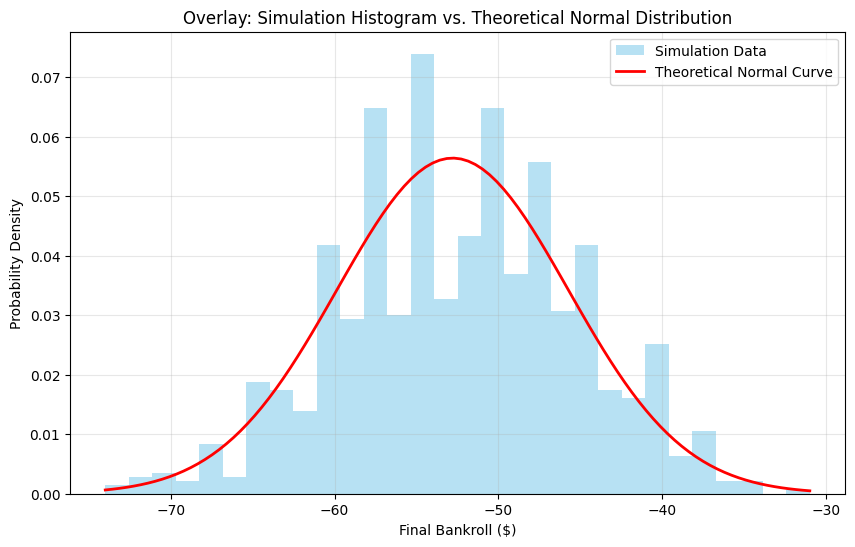

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(payoff, bins=30, density=True, alpha=0.6, color='skyblue', label='Simulation Data')

x = np.linspace(min(payoff), max(payoff), 100)
plt.plot(x, st.norm.pdf(x, mu, sigma), color='red', linewidth=2, label='Theoretical Normal Curve')

plt.title("Overlay: Simulation Histogram vs. Theoretical Normal Distribution")
plt.xlabel("Final Bankroll ($)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()